In [1]:
%load_ext tikzmagic
%matplotlib inline

# 베르누이분포와 이항분포

## 베르누이분포

<b>베르누이분포(bernoulli distribution)</b>는 값이 두가지로만 나오는 범주값 확률변수의 확률분포다. 예를 들어 동전을 한 번 던졌을 때 앞면 혹은 뒷면이 나오는 것은 베르누이분포를 따르는 확률변수다. 또한 앞 절에서 설명한 팁 데이터에서 성별을 나타내는 sex 필드나 흡연유무를 나타내는 smoker 필드, 그리고 점심/저녁을 나타내는 time 필드는 모두 베르누이분포를 따른다고 할 수 있다. 베르누이분포의 값은 성별일 경우 "Male/Female", 흡연유무를 나타내는 경우 "Yes/No"같이 문자열이 되는 경우가 많지만 수학적 모형을 위해 이 값을 0과 1이라는 숫자로 바꾸어서 사용하는 경우가 보통이다. 어느 값을 0으로 하고 어느 값을 1로 할지는 분석하는 사람의 마음대로다.

### 베르누이분포의 확률분포함수

확률변수 $x$가 베르누이분포를 따르는 경우 다음과 같이 표시한다.

$$ x \sim \text{Bern}(x) $$

위 식에서 $\text{Bern}(x)$은 베르누이분포의 확률질량함수를 가리키는 기호다. 

베르누이분포의 확률질량함수 $\text{Bern}(x)$의 수식은 다음과 같다.

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

이 식에서 $x$의 값이 1이 될 확률을 $\mu$라는 기호로 표시한다. $x$의 값이 0이 될 확률은 $1-\mu$가 된다. 위 식에서 베르누이분포의 모수는 $\mu$ 하나만 있다는 것을 알 수 있다. 모수는 위 식에서 표시하였듯이 확류변수의 값 기호 $x$ 오른쪽에 세미콜론(;) 기호를 붙이고 그 옆에 표시한다. 만약 1과 0이 나올 확률이 같다면 $\mu=0.5$가 되므로 다음과 같이 쓸 수 있다. 

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
0.5   & \text{if }x=1, \\
0.5 & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

확률질량함수 $\text{Bern}(x)$을 다음과 같이 쓰기도 한다. $x$의 값에 0과 1을 각각 대입해보면 이 식과 위에서 쓴 식은 같은 식이라는 것을 알 수 있을 것이다.

$$ \text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)} $$

만약 1과 0이 나올 확률이 같다면 다음과 같이 쓸 수 있다. 

$$ \text{Bern}(x;\mu) = 0.5^x0.5^{(1-x)} $$



### 베르누이 분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 베르누이분포를 시뮬레이션할 수 있는 `bernoulli` 클래스를 제공한다. 우선 다음과 같이 모수를 지정한 클래스 인스턴스를 만든다.

In [2]:
from scipy.stats import bernoulli

mu = 0.5
x = bernoulli(p=mu)
x

`pmf` 메서드를 사용하면 확률질량함수를 계산할 수 있다. 인수로는 확률변수가 가질 수 있는 값 즉, 0과 1을 넣는다.

In [3]:
x.pmf([0, 1])

array([0.5, 0.5])

`rvs` 메서드를 사용하면 시뮬레이션을 통해 표본을 측정할 수 있다. 인수로는 시뮬레이션 즉, 표본 개수를 넣는다. `np.random.seed` 명령은 시뮬레이션의 시드값을 설정하기 위한 것이다. 시드값이 같으면 시뮬레이션 값은 항상 동일한 값이 나온다.

In [4]:
import numpy as np

np.random.seed(0)

samples = x.rvs(10)
samples

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

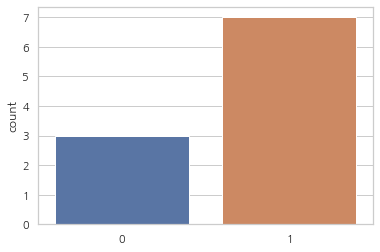

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(samples);
plt.show()

### 베르누이분포의 예

위에서 이야기한대로 팁 데이터에서 성별을 나타내는 sex 데이터는 남성 또는 여성의 두 가지 값만 가지므로 베르누이분포를 따르는 확률변수다. 따라서 다음과 같이 표현할 수 있다. 

$$ \text{sex} \sim \text{Bern}(\text{sex};\mu_{\text{sex}}) $$

sex 데이터의 확률분포는 다음과 같이 시각화할 수 있다.

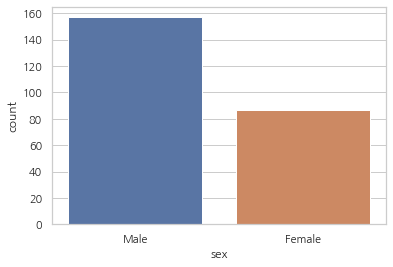

In [6]:
tips = sns.load_dataset("tips")

sns.countplot(x="sex", data=tips)
plt.show()

### 베르누이분포의 모수추정

베르누이분포는 확률분포함수가 고정된 수식으로 표현된 확률분포모형이므로 모수값 $\mu$만 알 수 있다면 확률분포함수를 완전히 알아내는 것이다. 그러면 베르누이분포의 모수는 다음 수식으로 추정한다. 이 식은 이후에 설명할 최대가능도추정(maximum likelihood estimation)방법을 따른 결과이다. 자세한 이론은 이후에 다루도록 한다.

$$ \hat{\mu} = \dfrac{N_1}{N_1 + N_0} $$

이 식에서 수학기호 $\hat{\mu}$는 모수 $\mu$의 추정치를 말한다. $N_0$는 데이터 값이 0인 횟수, $N_1$은 데이터 값이 1인 횟수다. 즉, 전체 데이터 중 1이 나온 횟수의 비율이 모수 $\mu$의 추정치 $\hat{\mu}$가 된다. 


실제로 sex 데이터의 모수를 추정해보자. 여기에서는 남자(Male)인 경우를 $x=1$인 경우라고 가정한다. 다음 코드로 $N_1=157, N_0=87$이라는 것을 알 수 있다.

In [7]:
vc = (tips["sex"] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1, N0

(157, 87)

따라서 모수의 추정치는 약 0.6434426229508197가 된다.

In [8]:
mu_hat = N1 / (N1 + N0)
mu_hat

0.6434426229508197

### 신뢰구간

이렇게 모수를 추정하였지만 아직 다음과 같은 몇가지 의문점이 남아있다. 

1. 이 모수 추정치는 정말 정확한 값인가? 
1. 만약 이 모수 추정치가 정확한 값이 아니라면 어느 정도의 신뢰도를 가지는 것인가?

첫번째 질문에 대한 답은 당연히 "아니다(No)"이다. 예를 들어 우리가 측정한 데이터의 개수가 달라지면 이 모수 추정치는 달라진다. 만약 데이터가 10개밖에 없다면 모수의 추정치는 다음과 같이 0.8이 된다.

In [9]:
vc = (tips["sex"][:10] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1 / (N1 + N0)

0.8

우리가 추정에 사용한 표본에 따라 추정치가 변하는 것을 알 수 있다. 따라서 위에서 구한 추정치는 정확한 값이라고 할 수 없다. 그렇다면 이렇게 부정확한 모수 추청치의 신뢰도는 어떻게 구할 것인가? 이 부분에 모수 추정치의 <b>신뢰구간(confidence interval)</b>이라는 것을 사용하여 구할 수 있다. 신뢰구간은 모수의 값이 특정한 확률로 그 구간 내에 있는 구간이다. 이 때 확률은 <b>유의수준(significance level)</b>이라는 수치로 지정한다. 만약 유의수준이 $\alpha$면 확률은 $1-\alpha$다. 예를 들어 5% 유의수준의 신뢰구간은 모수의 값이 95%의 확률로 그 구간 안에 있다는 뜻이다.  

베르누이분포의 모수 $\mu$의 신뢰구간은 statsmodels 패키지의 `proportion_confint` 함수로 구할 수 있다. `proportion_confint` 함수는 3가지 인수를 가진다.

* `count`: 표본값이 1인 횟수
* `nobs`: 전체 표본의 수
* `alpha`: 유의수준. 디폴트 0.05 (=5%)
* `method`: 추정방법. 다음 문자열 중 하나 `“normal”`, `“agresti_coull”`, `“beta”`, `“wilson”`, `“binom_test”`. 디폴트 `“normal”`

이 방법으로 sex 데이터의 모수의 5% 유의수준 신뢰구간을 구하면 다음과 같이 0.5833428537739491 ~ 0.7035423921276902 구간이 나온다.

In [10]:
from statsmodels.stats.proportion import proportion_confint

vc = (tips["sex"] == "Male").value_counts()
N1, N0 = vc[True], vc[False]

ci1, ci2 = proportion_confint(N1, N0 + N1)
ci1, ci2

(0.5833428537739491, 0.7035423921276902)

### 모수검정

위와 같이 신뢰구간을 구했지만 아직 남아있는 의문이 있다. 

1. 모수의 정확한 값이 특정한 값, 예를 들어 0.5가 아닐 가능성은 어느 정도일까?
1. 모수의 정확한 값을 그냥 0.6이라고 해도 될까?

이 모수 추정치가 정확한 값이 아니라면 원래 정확한 모수는 전혀 다른 값, 예를 들어 0.6이나 0.5일 수도 있다. 그런데 표본을 측정하다보니 어쩌다 0.6434426229508197라는 값이 나온 것일 수도 있다. 그렇다면 원래의 정확한 모수의 값이 0.5인데 이렇게 어쩌다 0이 아닌 값이 나왔을 가능성은 어느 정도일까? 이 문제는 <b>모수검정(parameter testing)</b>이라는 방법으로 풀 수 있다.

<b>검정(testing)</b>은 특정한 가설이 사실인지 아닌지를 알아보는 방법이다. 그 중에서도 모수검정은 모수의 값이 특정한 값과 같을(혹은 크거나 작을) 가능성을 확인하는 방법이다. 모수검정에서 사용하는 가설 $H_0$는 다음과 같다. 

$$ H_0: \mu = \mu_0 $$

$\mu_0$는 우리가 비교하려는 값이다. 예를 들어 모수의 정확한 값이 0.5라고 생각된다면 $\mu_0=0.5$이고 모수의 정확한 값이 0.6이라고 생각된다면 $\mu_0=0.6$이 된다. 

검정을 실시하면 <b>검정통계량(test statistics)</b>과 <b>유의확률(p-value)</b>이라는 것을 계산한다.

* 검정통계량: 표본 데이터 값 집합을 입력으로 계산되는 특정한 함수의 값
* 유의확률: 가설이 맞을 가능성

검정통계량은 표본 데이터 값을 특정한 함수에 모두 넣어서 계산한 값이다. 이 값을 이용하여 가설이 맞을 가능성을 알려주는 유의확률을 계산한다. 만약 유의확률값이 아주 작다면, 즉 0에 가까운 값이라면 이 가설은 맞을 가능성이 아주 작기 때문에 틀렸다고 생각하여 가설을 <b>기각(reject)</b>하게 된다. 반대로 유의확률값이 유의수준(significance level)이라고 부르는 기준값보다 크다면 그 가설은 틀렸다고 할 수 없기 때문에 가설을 <b>채택(accept)</b>하게 된다. 보통 기준이 되는 유의수준은 5%(0.05) 혹은 1%(0.01)를 사용한다.

scipy 패키지의 stats 서브패키지는 베르누이모수를 검정할 수 있는 `binom_test` 함수를 제공한다. 이 함수의 인수는 다음과 같다.

* `x`: 데이터 표본 중 1이 나온 횟수
* `n`: 데이터 표본의 개수
* `p`: 가설의 모수값 $\mu_0$. 디폴트 0.5

이 함수를 이용하여 모수의 정확한 갑이 0.5일 가능성을 검증해보자.

In [11]:
samples = (tips["sex"] == "Male").astype(int).values
samples

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [12]:
from scipy.stats import binomtest

result = binomtest(sum(samples), n=len(samples))
result.pvalue

8.74669702513338e-06

이 유의확률은 유의수준 1%보다 아주 작으므로 모수의 정확한 값이 0.5일 가능성은 거의 없다고 생각해도 된다. 

이번에는 모수값을 그냥 0.6이라고 해도 되는지를 알아보자. 이 때는 `p` 값을 0.6으로 넣는다.

In [13]:
result = binomtest(sum(samples), n=len(samples), p=0.6)
result.pvalue

0.17056745244373592

유의확률이 17%가 넘기 때문에 0.6434426229508197이 아닌 0.6이라고 해도 무방하다는 것을 알 수 있다. 

### 베이즈 추정법

마지막으로 만약 극단적으로 데이터를 다음과 같이 1번부터 3번까지 3개만 얻는다면 모두 남성(Male)이라는 결과가 나온다.

In [14]:
tips["sex"][1:4]

1    Male
2    Male
3    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

그러면 모수의 추정치는 1이 된다. 만약 정말 베르누이분포의 모수값이 1이라면 이후에 측정할 모든 표본값은 언제나 1이 나와야 한다는 뜻이다. 하지만 우리의 상식으로는 그럴 가능성이 극히 적다는 것을 안다. 이 추정치는 표본을 3개밖에 쓰지 않았기 때문에 얻어진 극단적으로 부정확한 값이며 실제 값은 1보다 작을 것이라는 것이 우리의 상식에 맞는 결과다. 즉, 우리의 상식이라는 추가적인 정보를 이 추정치에 반영할 수 있는 방법이 필요하다. 이는 이후의 절에서 설명할 <b>베이즈 추정(Bayesian estimation)</b> 방법을 사용하면 된다. 

## 이항분포

베르누이분포를 따르는 모수 $\mu$인 확률변수에서 $N$개의 표본을 얻었을 때 그 중 1인 값이 나오는 횟수의 분포를 <b>이항분포(binomial distribution)</b>라고 한다. 
어떤 확률변수 $x$가 이항분포를 따를 때 다음과 같이 표시한다.

$$ x \sim \text{Bin}(x) $$

동전을 한 번 던질 때 나오는 값은 베르누이분포를 따르므로 동전을 $N$번 던져서 앞면이 나오는 횟수는 이항분포가 된다.

위에서 설명한 scipy의 확률변수 시뮬레이션 기능을 통해 $N=10, \mu=0.5$인 이항분포의 표본 5개를 구해보자.

In [15]:
mu = 0.5
x = bernoulli(p=mu)

binomial_samples = []
for i in range(5):
    print(f"{i + 1}회 이항시도:")
    bernouilli_samples = x.rvs(10)
    binomial_sample = bernouilli_samples.sum()
    binomial_samples.append(binomial_sample)
    print("10회를 시행한 베르누이 샘플 =", bernouilli_samples)
    print("베르누이 샘플 10개 중 1이 나온 횟수 =", binomial_sample)
    print("-" * 80)

print("결론:")    
print("이항분포 표본 =", binomial_samples)

1회 이항시도:
10회를 시행한 베르누이 샘플 = [1 1 1 1 0 0 0 1 1 1]
베르누이 샘플 10개 중 1이 나온 횟수 = 7
--------------------------------------------------------------------------------
2회 이항시도:
10회를 시행한 베르누이 샘플 = [1 1 0 1 0 1 0 1 1 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 6
--------------------------------------------------------------------------------
3회 이항시도:
10회를 시행한 베르누이 샘플 = [0 1 0 1 0 1 1 1 1 1]
베르누이 샘플 10개 중 1이 나온 횟수 = 7
--------------------------------------------------------------------------------
4회 이항시도:
10회를 시행한 베르누이 샘플 = [0 0 1 0 1 1 0 0 0 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 3
--------------------------------------------------------------------------------
5회 이항시도:
10회를 시행한 베르누이 샘플 = [1 0 1 0 0 0 1 0 0 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 3
--------------------------------------------------------------------------------
결론:
이항분포 표본 = [7, 6, 7, 3, 3]


여기에서는 표본을 5개만 측정하였지만 아주 많은 수의 측정을 반복한다면 어떨까? 아주 재수가 없다면 앞면이 단 한번도 나올 수 없을 것이고 아주 재수가 좋다면 10번 모두 앞면이 나올 수도 있을 것이다. 하지만 가장 확률이 높은 경우는 10번의 절반인 5번 나오는 경우일 것이다. 즉, 시행횟수가 $N$인 이항분포의 표본값은 0부터 $N$까지의 값을 가질 수 있다. 

### 이항분포의 확률분포함수

이항분포는 시행횟수 $N$과 베르누이모수 $\mu$ 이렇게 두 개의 모수를 가진다. 시행횟수가 $N$이고 베르누이모수가 $\mu$인 이항분포의 확률분포함수 수식은 다음과 같이 구할 수 있다. 

$$
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
$$

이 식에서 (𝑁𝑥) 기호는 <b>조합(combination)</b>이라는 기호로 $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$
\binom N x =\dfrac{N!}{x!(N-x)!}
$$

$!$ 기호는 <b>팩토리얼(factorial)</b>이라고 하며 다음처럼 정의한다.

$$
N! = N\cdot (N-1) \cdots 2 \cdot 1
$$

### 이항분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 이항분포를 시뮬레이션할 수 있는 `binom` 클래스를 제공한다. 사용방법은 앞에서 설명한 베르누이분포 시뮬레이션 클래스와 같다. 우선 시행횟수 

In [16]:
from scipy.stats import binom

N = 10
mu = 0.5
x = binom(n=N, p=mu)
x

`pmf` 메서드를 사용하면 확률질량함수를 계산할 수 있다. 인수로는 확률변수가 가질 수 있는 값 즉, 0부터 $N$까지의 정수값을 넣는다.

In [17]:
xx = np.arange(11)
p = x.pmf(xx)
p

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

이 값을 그려보면 위에서 그린 것과 같은 모양이 된다.

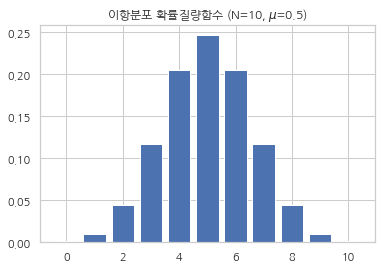

In [18]:
plt.bar(xx, p)
plt.title("이항분포 확률질량함수 (N=10, $\mu$=0.5)")
plt.show()

`rvs` 메서드를 사용하면 시뮬레이션을 통해 표본을 측정할 수 있다.

In [19]:
s = x.rvs(100)
s

array([3, 3, 6, 3, 4, 4, 6, 3, 7, 3, 8, 5, 8, 5, 6, 2, 4, 3, 4, 3, 4, 5,
       3, 6, 5, 4, 5, 3, 5, 7, 4, 6, 3, 6, 4, 4, 5, 2, 7, 1, 6, 4, 6, 8,
       4, 5, 5, 5, 4, 8, 5, 7, 6, 4, 6, 5, 7, 5, 7, 6, 6, 5, 8, 6, 5, 5,
       2, 4, 6, 4, 5, 5, 3, 4, 5, 5, 5, 6, 6, 5, 7, 4, 5, 7, 6, 6, 3, 7,
       6, 9, 3, 7, 3, 5, 3, 7, 6, 5, 5, 3])

numpy 패키지의 `bincount` 함수를 사용하면 이항함수 표본에서 각 값이 나온 횟수를 카운트할 수 있다. 

In [20]:
np.bincount(s, minlength=N + 1)

array([ 0,  1,  3, 16, 17, 26, 20, 11,  5,  1,  0], dtype=int64)

이론적인 확률질량함수와 시뮬레이션 결과를 비교하면 다음 그림과 같다.

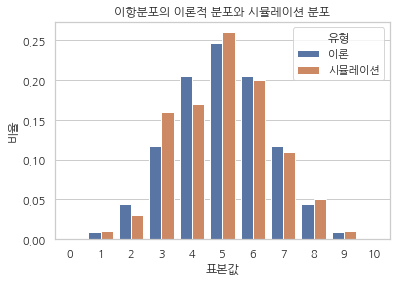

In [21]:
import pandas as pd

y = np.bincount(s, minlength=N + 1) / float(len(s))
df = pd.DataFrame({"이론": p, "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 이항분포와 베르누이분포의 비교

지금까지 설명했듯이 이항분포를 따르는 확률변수 $y$는 베르누이분포를 따르는 확률변수 $x$에서 파생된 확률변수다. 이항분포와 베르누이분포 사이에는 다음과 같은 관계가 성립한다.

1. 베르누이분포를 따른 확률변수 $x$의 표본 $N$개를 모으면 이항분포를 따르는 확률변수 $y$의 표본 한 개가 얻어진다.
1. 베르누이분포의 모수 $\mu_x$와 이 베르누이분포에서 파생된 이항분포의 모수 $\mu_y$는 같다.
1. 시행횟수 $N=1$인 이항분포는 베르누이분포다.

### 이항분포의 예

식당 팁 데이터에서 sex 필드 데이터는 베르누이분포를 따르는 확률변수의 표본이라고 하였다. sex 필드 데이터의 레코드는 전체가 244개이므로 전체 sex 필드 데이터에서 남성이 있는 레코드의 수는 $N=244$인 이항분포를 따르는 확률변수의 표본이 된다. 이 표본값은 157이다.

In [22]:
len(tips), (tips.sex == "Male").sum()

(244, 157)

만약 sex 필드 데이터를 4개씩 묶어서 4개 중 남성이 있는 레코드의 개수를 센다면 이는 $N=4$인 이항분포를 따르는 확률변수의 표본이라고 할 수 있다. 실제로 이 방법으로 남성이 나오는 횟수를 세면 다음과 같아진다.

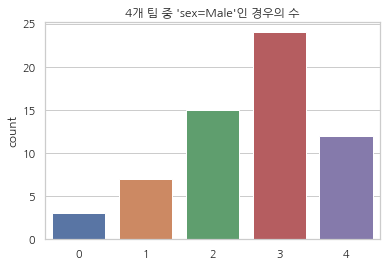

In [23]:
s = list(map(lambda x: (x == "Male").sum(), np.array_split(tips.sex, len(tips.sex) / 4)))

sns.countplot(s)
plt.title("4개 팀 중 'sex=Male'인 경우의 수")
plt.show()

위에서 sex 데이터의 베르누이모수는 약 0.643이라고 추정하였다. 이 모수값은 이항분포에도 그대로 적용되므로 $N=4, \mu=0.643$인 이항분포의 확률질량함수를 그리면 다음과 같다.

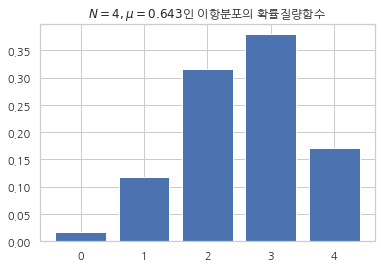

In [24]:
N = 4
mu = 0.643
x = binom(n=N, p=mu)
xx = np.arange(N + 1)
p = x.pmf(xx)
plt.bar(xx, p)
plt.title("$N=4, \mu=0.643$인 이항분포의 확률질량함수")
plt.show()

두 그래프를 비교하면 아래와 같다.

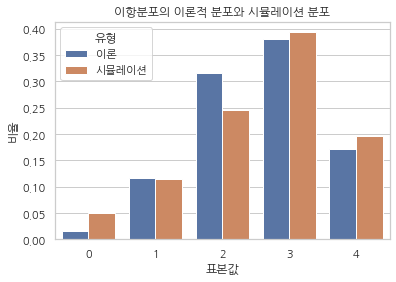

In [25]:
y = np.bincount(s, minlength=N + 1) / float(len(s))
df = pd.DataFrame({"이론": p, "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 이항분포의 모수추정

이항분포의 모수는 시행횟수 $N$과 베르누이모수 $\mu$다. 이항분포의 모수추정 문제는 다음과 같은 두 가지가 있을 수 있다. 

1. 시행횟수 $N$을 정확하게 알고 있고 베르누이모수 $\mu$만 추정해야 하는 경우
1. 시행횟수 $N$과 베르누이모수 $\mu$를 모두 추정해야 하는 경우

만약 시행횟수 $N$을 정확하게 알고 있다면 $M$개의 이항분포 표본값으로부터 베르누이 모수는 다음과 같이 추정할 수 있다.

$$
\hat{\mu} = \dfrac{\sum_{i=1}^M y_i}{MN}
$$

만약 sex 데이터에서 전체 레코드 중 남성의 수를 $N=244$인 이항분포의 표본으로 본다면 모수는 다음과 같이 추정한다.

In [26]:
(tips.sex == "Male").sum() / len(tips)

0.6434426229508197

만약 sex 데이터를 4개의 레코드씩 묶어서 각 그룹의 남성 수를 $N=4$인 이항분포의 표본으로 본다면 모수는 다음과 같이 추정한다.

In [27]:
groups = np.array_split(tips.sex, len(tips.sex) / 4)
M = len(groups)
N = 4
y_i = list(map(lambda x: (x == "Male").sum(), groups))
sum_y_i = np.sum(y_i)
sum_y_i / (M * N)

0.6434426229508197

두 방법 모두 동일한 값을 추정하고 있는 것을 알 수 있다.

시행횟수 $N$을 알지 못하는 경우에는 distfit 패키지를 이용할 수 있다. distfit 패키지는 다음 명령으로 설치한다.

```
pip install distfit
```

사용방법은 다음 코드와 같이 model 객체를 계산하면 된다.

In [28]:
from distfit import distfit

dist = distfit(method='discrete')
model = dist.fit_transform(np.array(s))["model"]

[distfit] >fit..
[distfit] >transform..
[distfit] >Fit using binomial distribution..
[distfit] >[binomial] [RSS=0.00428] [n=4] [p=0.664505] [chi^2=0.00143]
[distfit] >Compute confidence interval [discrete]


model 객체는 파이썬 type 타입 객체이다. `name` 키는 어떤 분포인지를 나타낸다. 다음과 같이 이항분포임을 알 수 있다.

In [29]:
model["name"]

'binom'

`n`, `p` 키에는 각각 $N$, $\mu$ 추정치가 들어있다.

In [30]:
model["n"]

4

In [31]:
model["p"]

0.6645045188248099